# Data Science Project: Predicting Final Term Marks of Students 

Introduction:

This project is based on the data gathered from 2 schools of Portugal. The data attributes include student grades, demographic, social and school related features. It is a regression model where we need to predict the final grades of students using Machine Learning tools however our goal is not just to predict but also to understand the data. How the various features affect the performance of students will be studied in this project.


In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
#reading the data from csv file
df1 = pd.read_csv("student-por.csv")

#To view all columns
with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(df1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,4,10,11,11


Attribute Information:

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2 sex - student's sex (binary: 'F' - female or 'M' - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: 'U' - urban or 'R' - rural)

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2- 5th to 9th grade, 3- secondary education or 4- higher education)

8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2- 5th to 9th grade, 3- secondary education or 4- higher education)

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)

31 G2 - second period grade (numeric: from 0 to 20)

32 G3 - final grade (numeric: from 0 to 20, output target)

Task is to predict G3 ie final grades of students using rest of the features.

In [3]:
#this data is a mixture of categorical and continuous features.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [4]:
# We will check for null/missing values in dataset
df1.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

There are no missing values present in this dataset, in case we do have we have to find a way to fill the null values normally we do this with the ("mean", "median", "mode" or we use other imputation techniques like Random Sample Imputation, Capturing NAN values with a new feature, End of Distribution imputation, Arbitrary imputation, KNN imputation etc.

# Data Analysis and Visualization

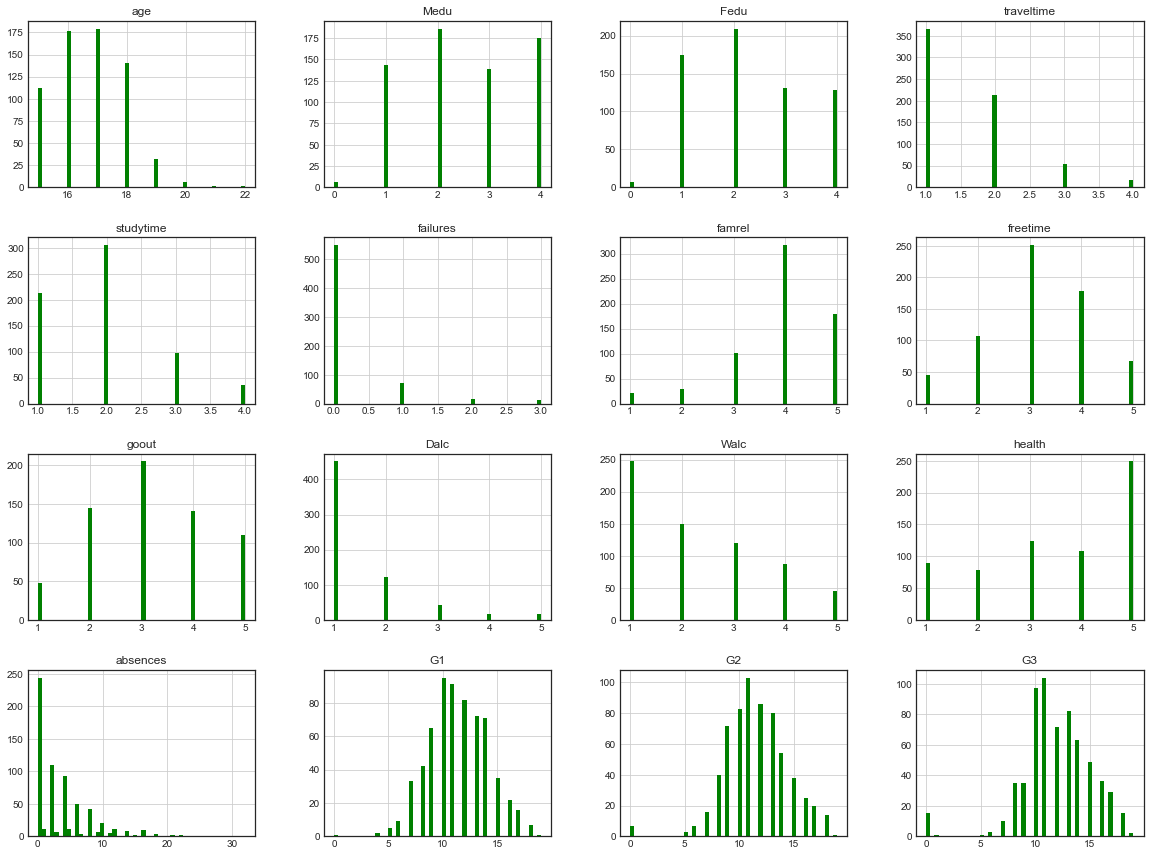

In [195]:
#Plotting histogram plot to see the count of students in various attributes.
import matplotlib.pyplot as plt
df1.hist(bins=50, figsize=(20,15), color='g')
plt.show()

Features with numerical data have been plotted here, we can see that students do belong to different family and social economic backgrounds but we also need to see whether this variation affects their grades which can be observed in the next graph.


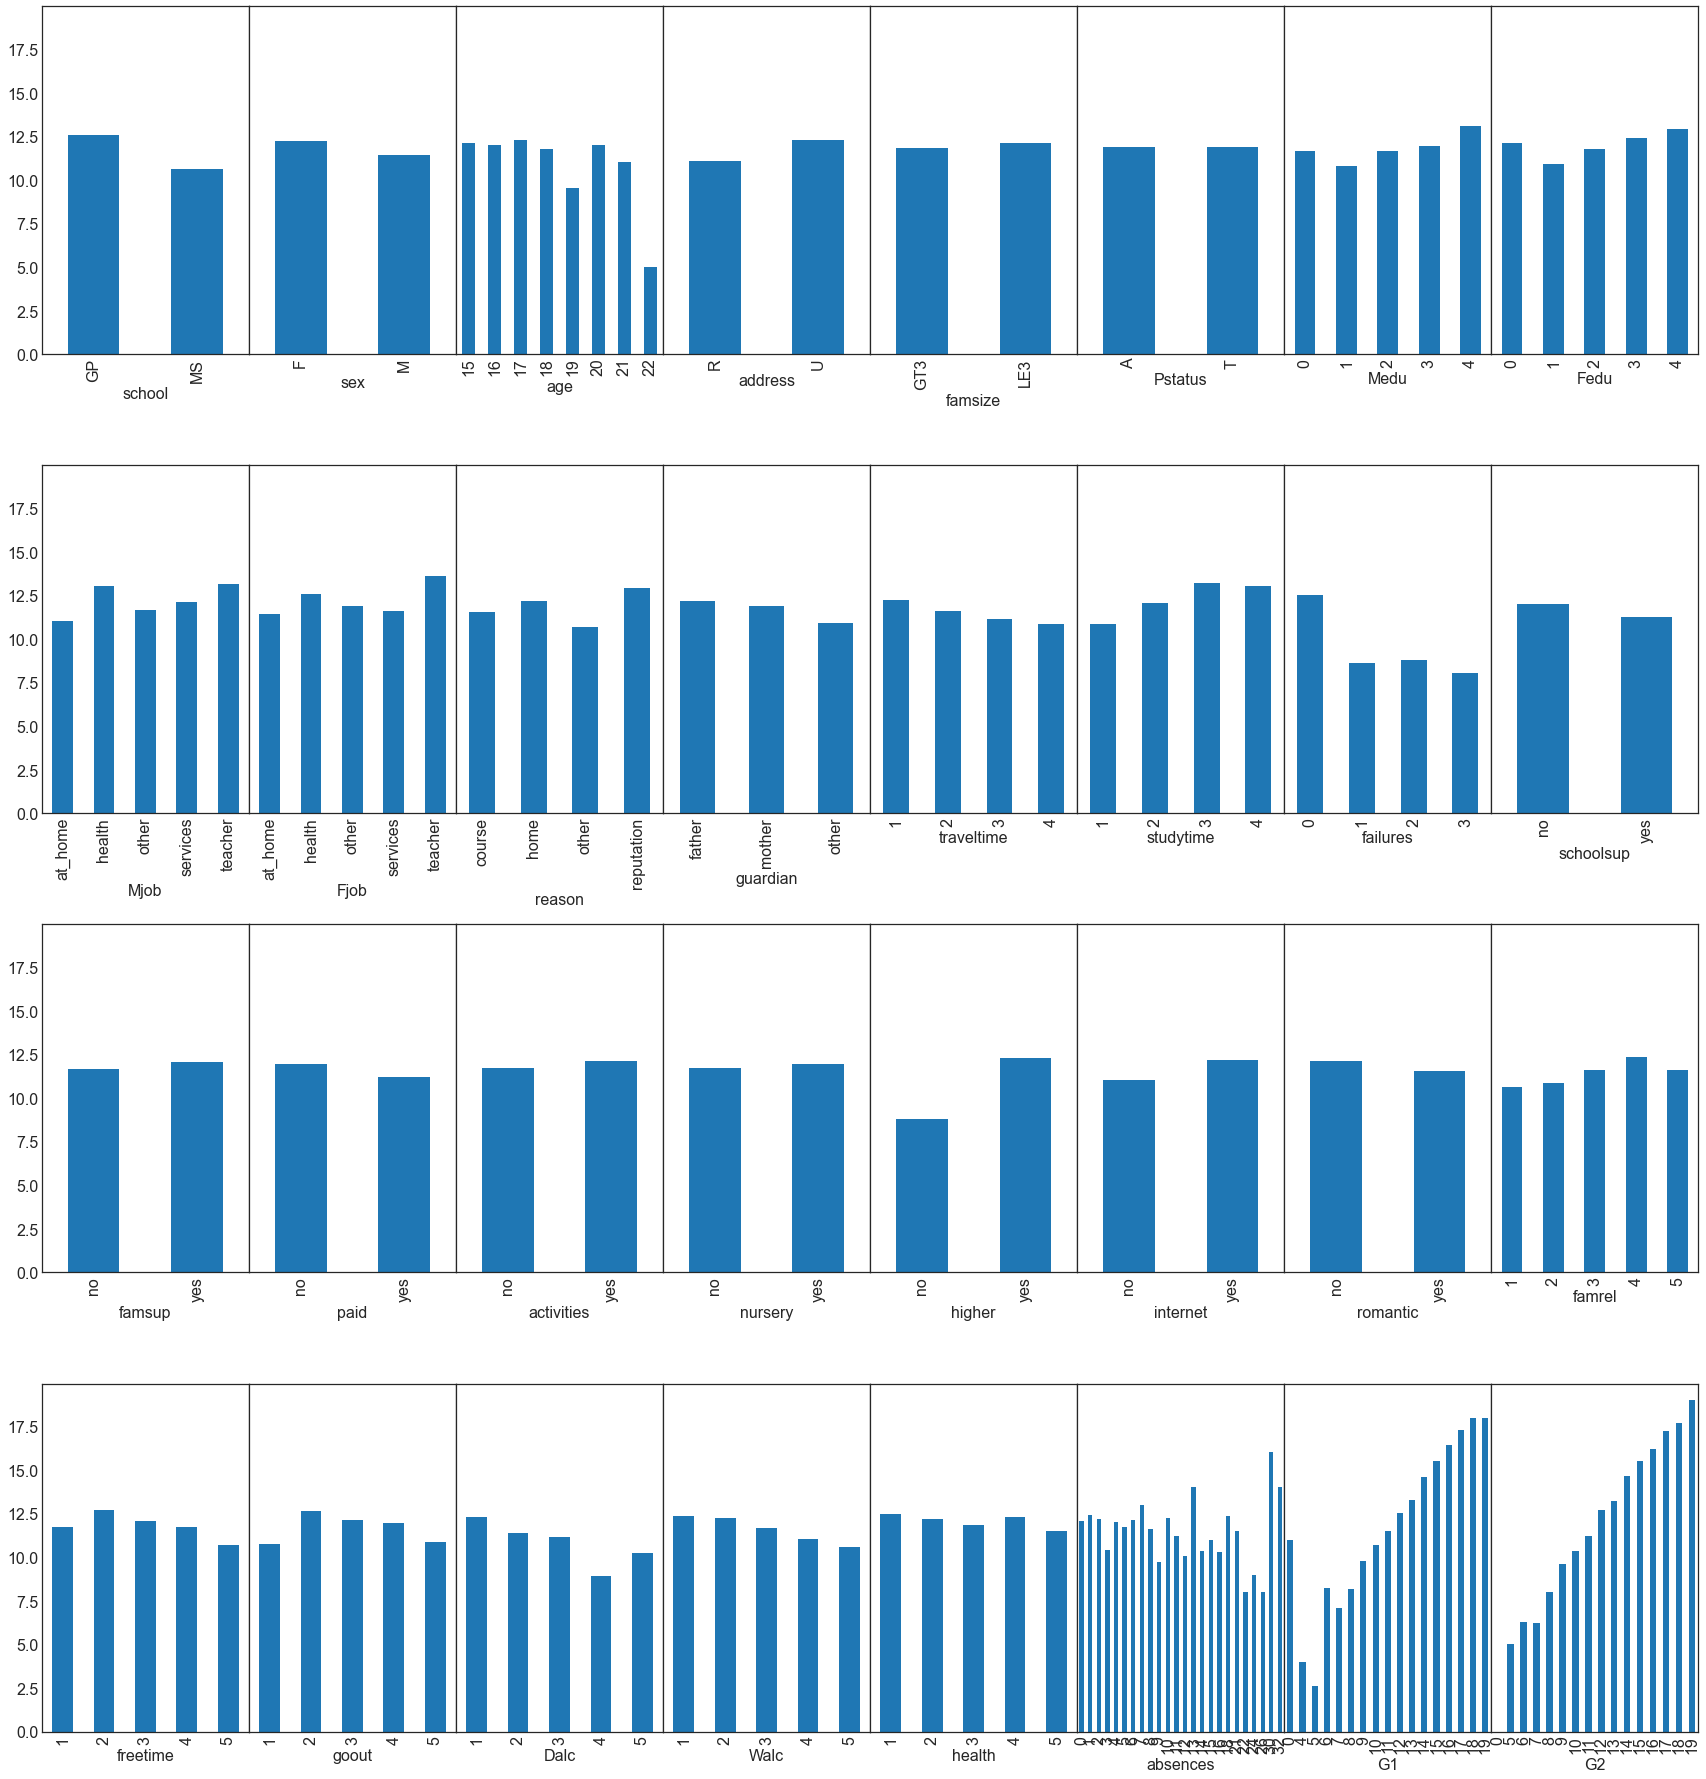

In [196]:
#Plotting a bar graph to see the difference in average marks scored by students of different sub categories of attributes.
target_col = 'G3'
cols=df1.columns.drop('G3')
plt.rcParams['font.size'] = '16'
fig, axes = plt.subplots(4,8, figsize=(24,25), gridspec_kw={'wspace':0}, sharey=True)
axe = axes.ravel()
for i,c in enumerate(cols):
    df1.groupby(c)[target_col].mean().plot(kind="bar", ax=axe[i])
plt.tight_layout()

From the above graph we can observe that the average marks scored by students are quite low but there is variation in average marks among categories of different attributes.

This variation is important because on the basis of this feature selection can be done as they demonstrate that categories have impact on marks of students.


We will be conducting ANOVA Test on our model for selecting relevant predictors, Anova can be defined as:

Analysis of variance (ANOVA) is a collection of statistical models and their associated estimation procedures (such as the "variation" among and between groups) used to analyze the differences among means. In its simplest form, ANOVA provides a statistical test of whether two or more population means are equal, and therefore generalizes the t-test beyond two means. 

Before conducting the Anova test we need to check its assumptions in order for the test results to be considered valid.

Independence:

This assumption is tested when the study is designed. What this means is that all groups are mutually exclusive, i.e. an individual can only belong in one group. Also, this means that the data is not repeated measures (not collected through time). In this data, this condition is met.

Normality:

We will test this assumption through a visual check- this is helpful when the sample is large. The reason this is true is that as the sample size increases, the statistical test's ability to reject the null hypothesis increases, i.e. it gains power to detect smaller differences as the sample size n increases.

One method of visually checking the distribution is to use a probability plot with or without the correlation value,
to assess the observed values correlation with the theoretical distribution in question - in the current case it would be the Gaussian (a.k.a the normal) distribution. This can be completed by using the probplot() method from Scipy.stats.

Looking at the below plotted probability plot and the residual structure it would also be reasonable to state this assumption is met.

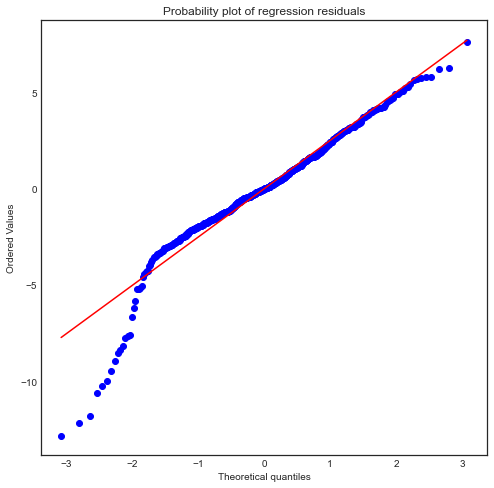

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
model=ols('G3~school+ age+ sex + address +famsize+ Pstatus+ Medu +Fedu +Mjob +Fjob+ reason +guardian +traveltime +studytime + failures+ schoolsup+ famsup+ paid+ activities+ nursery +higher+ internet+ romantic +famrel+ freetime+ goout +Dalc +Walc +health+ absences', data=df1).fit()
fig = plt.figure(figsize= (8, 8))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt)
ax.set_title("Probability plot of regression residuals")
ax.set

plt.show()

In [197]:
#Since most of our features are categorical, we will perform Hypothesis testing to check their relationship with Label column
#As we are checking categorical features against continuous label column we will use Anova-test.
import statsmodels.api as sm
from statsmodels.formula.api import ols
model=ols('G3~school+sex + address +famsize+ Pstatus+ Medu +Fedu +Mjob +Fjob+ reason +guardian +traveltime +studytime + failures+ schoolsup+ famsup+ paid+ activities+ nursery +higher+ internet+ romantic +famrel+ freetime+ goout +Dalc +Walc +health', data=df1).fit()
anova_result=sm.stats.anova_lm(model, type=2)
print(anova_result)

               df       sum_sq     mean_sq          F        PR(>F)
school        1.0   546.628653  546.628653  76.639961  2.002120e-17
sex           1.0   158.771329  158.771329  22.260503  2.953162e-06
address       1.0    33.945677   33.945677   4.759347  2.951998e-02
famsize       1.0    26.882128   26.882128   3.769003  5.267014e-02
Pstatus       1.0    11.259186   11.259186   1.578592  2.094438e-01
Mjob          4.0   187.992015   46.998004   6.589346  3.397743e-05
Fjob          4.0    54.481234   13.620309   1.909633  1.072277e-01
reason        3.0   111.814075   37.271358   5.225623  1.441171e-03
guardian      2.0    52.037443   26.018722   3.647950  2.661337e-02
schoolsup     1.0    94.849146   94.849146  13.298306  2.883010e-04
famsup        1.0     0.678955    0.678955   0.095193  7.577818e-01
paid          1.0     1.831486    1.831486   0.256783  6.125217e-01
activities    1.0     5.103564    5.103564   0.715544  3.979406e-01
nursery       1.0     0.034698    0.034698   0.0

With the help of Anova test we get the p-values of features which will be used to accept or reject the Null Hypothesis. The null hypothesis is a characteristic arithmetic theory suggesting that no statistical relationship and significance exists in a set of given, observed variables between two sets of observed data and measured phenomena.
To reject Null Hypothesis we take the significance value ie p-value <= 0.05


In [198]:
#Filtering the features which have p-value<=0.05
anova_result=pd.DataFrame(anova_result)
anova_result1 = anova_result[anova_result['PR(>F)'] <= 0.05] 
    
print('\nResult dataframe :\n', anova_result1)


Result dataframe :
             df      sum_sq     mean_sq          F        PR(>F)
school     1.0  546.628653  546.628653  76.639961  2.002120e-17
sex        1.0  158.771329  158.771329  22.260503  2.953162e-06
address    1.0   33.945677   33.945677   4.759347  2.951998e-02
Mjob       4.0  187.992015   46.998004   6.589346  3.397743e-05
reason     3.0  111.814075   37.271358   5.225623  1.441171e-03
guardian   2.0   52.037443   26.018722   3.647950  2.661337e-02
schoolsup  1.0   94.849146   94.849146  13.298306  2.883010e-04
higher     1.0  417.334074  417.334074  58.512241  7.893168e-14
romantic   1.0   32.118206   32.118206   4.503127  3.423467e-02
studytime  1.0  124.937912  124.937912  17.516895  3.265953e-05
failures   1.0  367.782816  367.782816  51.564917  2.020491e-12
Dalc       1.0   35.303264   35.303264   4.949687  2.645983e-02
health     1.0   38.936333   38.936333   5.459061  1.978943e-02


We can observe from the bar graph above that the features showing the difference in average marks obtained by students in sub categories of attributes related to demographic, social/emotional , school related etc. and the features obtained after applying ANOVA test are similar. Following are the relevant features which will be used for model building.  
             
    school 
    sex
    address
    age
    Medu
    Fedu
    internet
    abscences
    freetime
    goout
    Mjob
    Fjob
    reason
    guardian
    schoolsup
    higher
    romantic
    studytime
    failures
    Dalc
    Walc
    health
    Avg_G1_G2

We will be using these columns for our prediction, rest columns will be dropped

In [199]:
df1.drop(columns=['activities','nursery','famrel','famsize','Pstatus','traveltime', 'famsup','paid'], inplace=True, axis=1)
df1.head()

,school,sex,age,address,Medu,Fedu,Mjob,Fjob,reason,guardian,...,romantic,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,4,4,at_home,teacher,course,mother,...,no,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,1,1,at_home,other,course,father,...,no,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,1,1,at_home,other,other,mother,...,no,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,4,2,health,services,home,mother,...,yes,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,3,3,other,other,home,father,...,no,3,2,1,2,5,0,11,13,13


In [200]:
#We have many columns of categorical datatype which need to be converted to numerical data type
#We will use mapping function to convert binary category columns to numerical

df1['school']=df1['school'].map({'GP':1, 'MS':0})
df1['sex']=df1['sex'].map({'M':1,'F':0})
df1['address']=df1['address'].map({'U':1,'R':0})
df1['schoolsup']=df1['schoolsup'].map({'yes':1,'no':0})
df1['higher']=df1['higher'].map({'yes':1,'no':0})
df1['romantic']=df1['romantic'].map({'yes':1,'no':0})
df1['internet']=df1['internet'].map({'yes':1,'no':0})

df1.head()

,school,sex,age,address,Medu,Fedu,Mjob,Fjob,reason,guardian,...,romantic,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,18,1,4,4,at_home,teacher,course,mother,...,0,3,4,1,1,3,4,0,11,11
1,1,0,17,1,1,1,at_home,other,course,father,...,0,3,3,1,1,3,2,9,11,11
2,1,0,15,1,1,1,at_home,other,other,mother,...,0,3,2,2,3,3,6,12,13,12
3,1,0,15,1,4,2,health,services,home,mother,...,1,2,2,1,1,5,0,14,14,14
4,1,0,16,1,3,3,other,other,home,father,...,0,3,2,1,2,5,0,11,13,13


In [201]:
#One Hot Encoding for columns with more than 2 categories
dummies1=pd.get_dummies(data=df1.Mjob,prefix='Mjob', drop_first=True)
dummies2=pd.get_dummies(data=df1.Mjob,prefix='Fjob', drop_first=True)
dummies3=pd.get_dummies(data=df1.reason,prefix='reason', drop_first=True)
dummies4=pd.get_dummies(data=df1.guardian,prefix='guardian', drop_first=True)

In [205]:
#combining all the relevant categorical columns after converting them to numerical
df2=pd.concat([df1,dummies1,dummies2,dummies3,dummies4], axis=1)
df2.head()

,school,sex,age,address,Medu,Fedu,Mjob,Fjob,reason,guardian,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,1,0,18,1,4,4,at_home,teacher,course,mother,...,0,0,0,0,0,0,0,0,1,0
1,1,0,17,1,1,1,at_home,other,course,father,...,0,0,0,0,0,0,0,0,0,0
2,1,0,15,1,1,1,at_home,other,other,mother,...,0,0,0,0,0,0,1,0,1,0
3,1,0,15,1,4,2,health,services,home,mother,...,0,1,0,0,0,1,0,0,1,0
4,1,0,16,1,3,3,other,other,home,father,...,0,0,1,0,0,1,0,0,0,0


In [206]:
#these columns have been converted to numerical columns hence removing them
df2.drop(['Mjob','reason','guardian'],inplace=True,axis=1)

# Feature Selection

Text(0.5, 1.0, 'Correlation Heatmap')

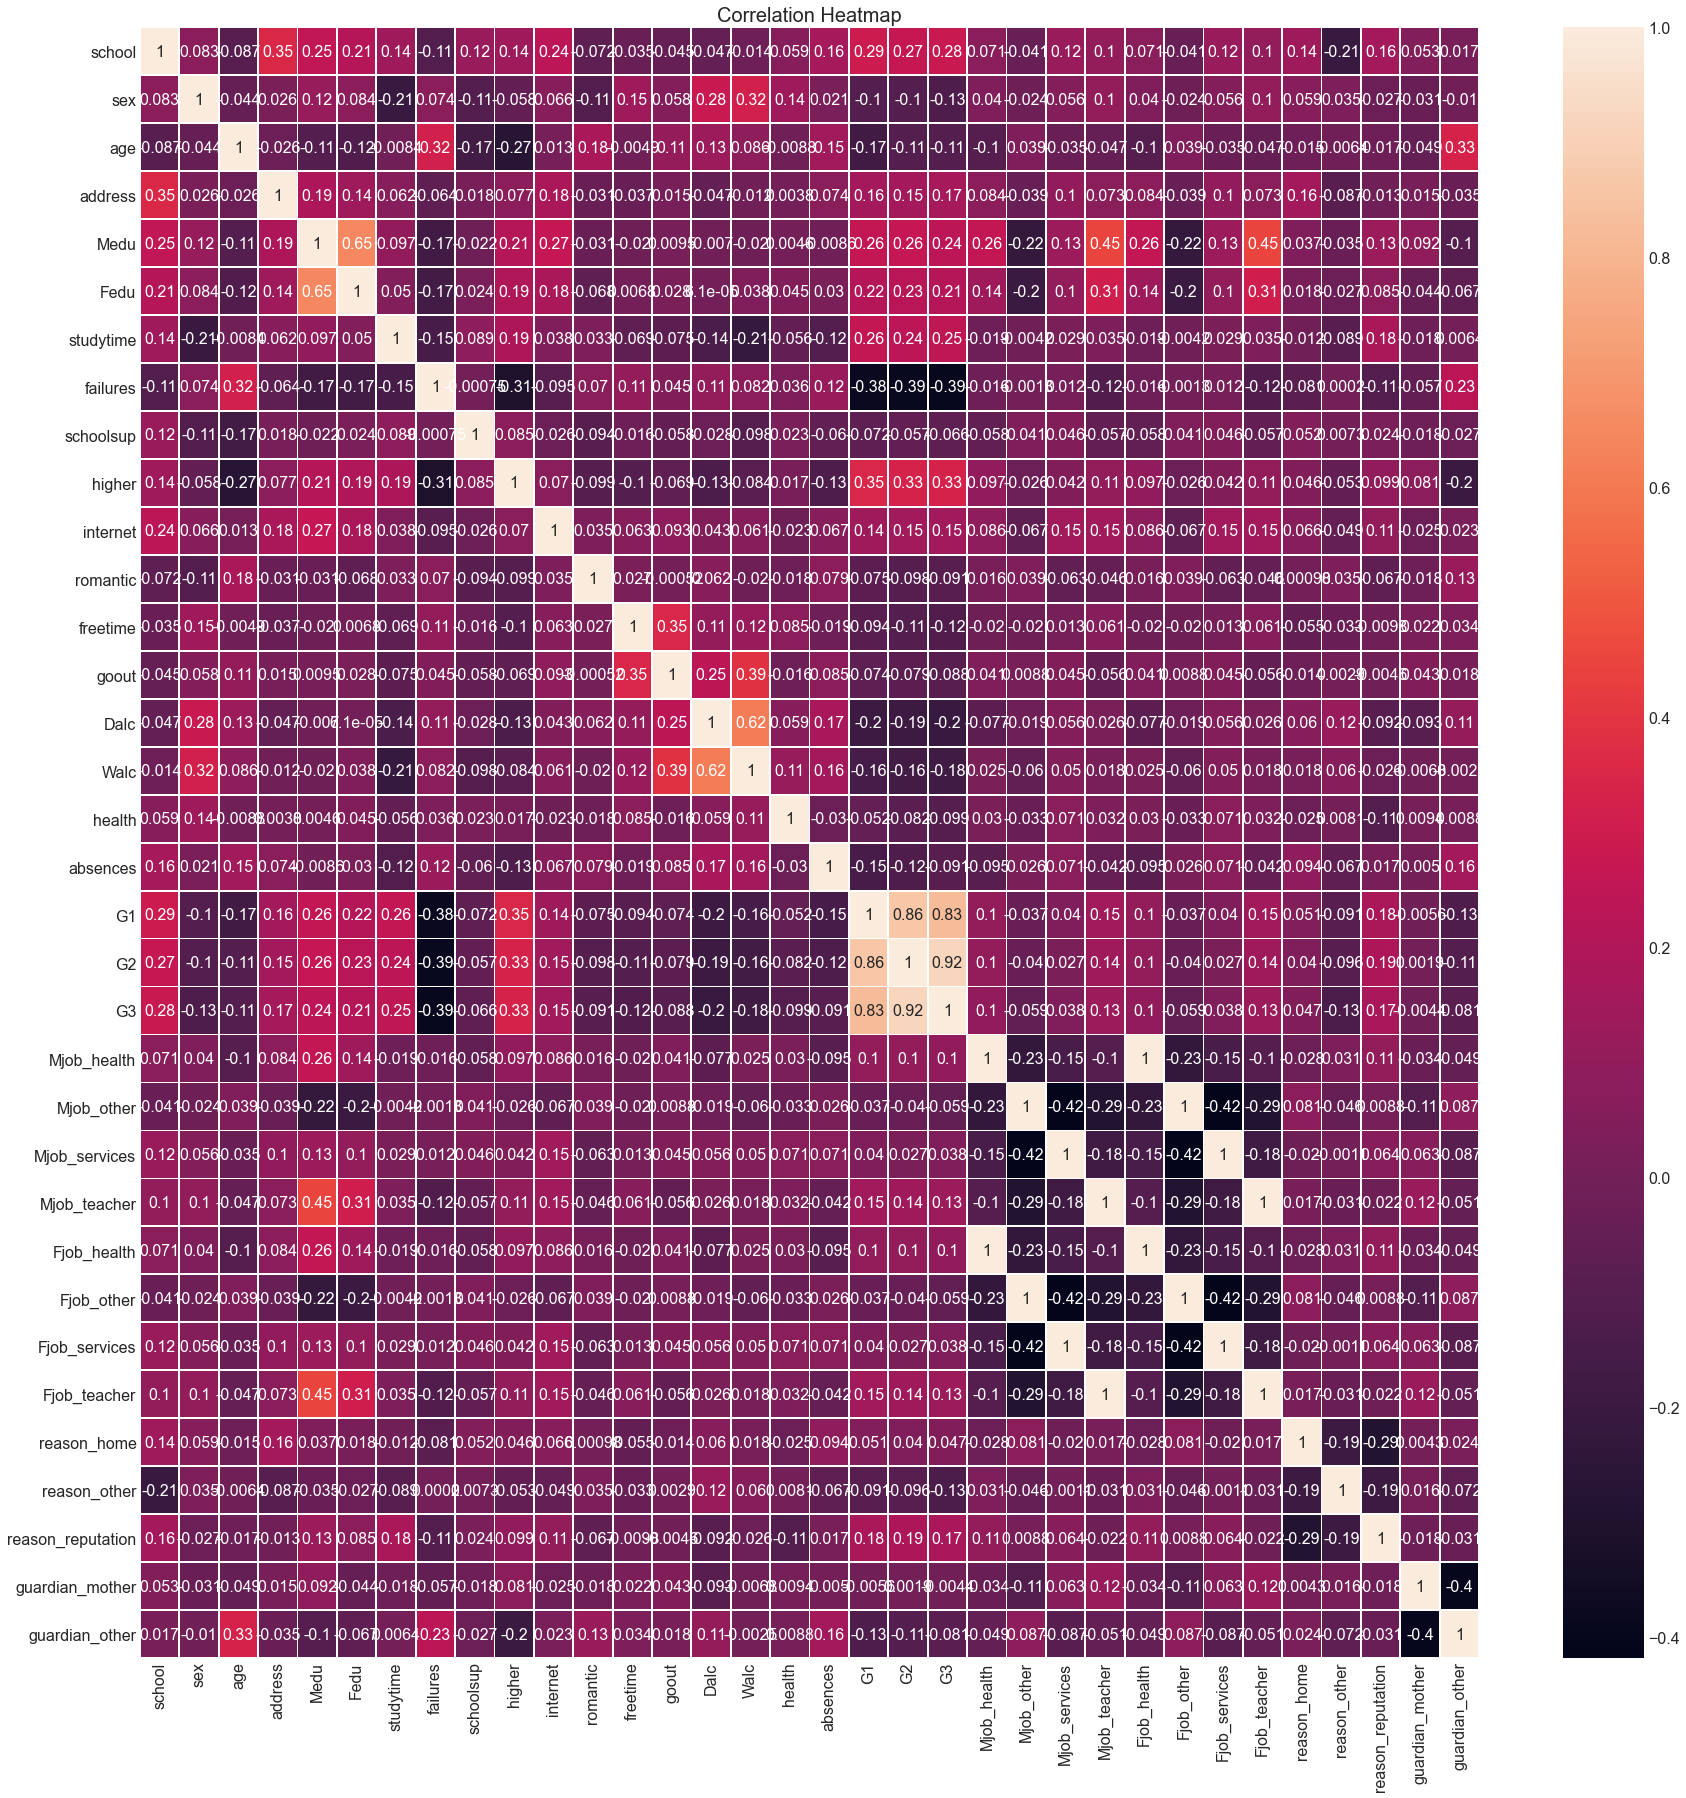

In [207]:
#We will plot a heatmap to check for correlation among the features.
cor = df2.corr()
plt.figure(figsize=(30,30))
sns.heatmap(cor, annot=True,linewidths=.8)
plt.title('Correlation Heatmap', fontsize=20)

Wow there is a lot going on here, but the advantage of using Heatmap is the colour coding which distinguishes the correlation strength among features using colors. As the scale on right side indicates dark colors and light colors are highly correlated features. 

We can conclude from the graph that columns Medu-Fedu, Mjob-Fjob (all categories), G1-G2, Dalc-Walc are highly correlated with each other thus we can drop either of the columns from the pair.

In the Heatmap above we can see strong correlation among G1 and G2 columns, in order to remove this collinearity we will make a new column containing the average of these 2 columns


What can we understand about the data from the Heatmap:

Positive Correlations:

1) Medu (Mothers education) and Fedu (Fathers education) show good positive impact on student's grades. This means parents having good educational background are actively involved in their wards' performance.

2) Studytime which is self explanatory in student's performance also influences positively the outcome of G3.

Negative Correlations:

1) There is some negative correlation of G3 (Final Grades) with Walc (Weekend alcohol consumption) and Dalc (Workday alcohol consumption).

2) The highest negative correlation is with "failures" or how many past classes they fail. This is indicative that the higher the amount of past classes failures the more likely it is for the student to get a lower grade and thus fail.


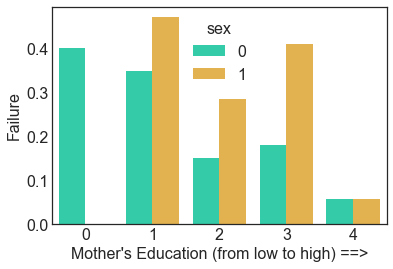

In [208]:
#We can observe through graphs as well the affect of Mother's Education on performance of students.
ax = sns.barplot(x = 'Medu', y = 'failures', hue='sex',
              data = df2, 
              palette="turbo",ci=0)
ax.set(xlabel="Mother's Education (from low to high) ==>", ylabel='Failure')
plt.show()

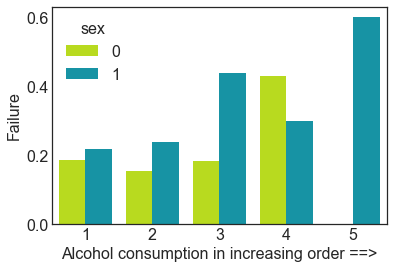

In [209]:
#Affect of Daily alcohol consumption on rate of failure among students
ax = sns.barplot(x = 'Dalc', y = 'failures', hue='sex',
              data = df2,ci=0, palette="nipy_spectral_r")
ax.set(xlabel="Alcohol consumption in increasing order ==>", ylabel='Failure')
plt.show()

In [210]:
#Making a new column Avg_G1_G2 which is the mean column of G1, G2 columns.
df2['Avg_G1_G2']=df2[['G1','G2']].mean(axis=1)
df2
df2.drop(['G1', 'G2'],inplace=True, axis=1)
df2.head()

,school,sex,age,address,Medu,Fedu,Fjob,studytime,failures,schoolsup,...,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,Avg_G1_G2
0,1,0,18,1,4,4,teacher,2,0,1,...,0,0,0,0,0,0,0,1,0,5.5
1,1,0,17,1,1,1,other,2,0,0,...,0,0,0,0,0,0,0,0,0,10.0
2,1,0,15,1,1,1,other,2,0,1,...,0,0,0,0,0,1,0,1,0,12.5
3,1,0,15,1,4,2,services,3,0,0,...,1,0,0,0,1,0,0,1,0,14.0
4,1,0,16,1,3,3,other,2,0,0,...,0,1,0,0,1,0,0,0,0,12.0


In [211]:
#removing these columns because they were highly correlated
df2.drop(['Fjob','Walc','Fedu'],inplace=True,axis=1)

In [213]:
df2.columns#final features that will be used in model making.

Index(['school', 'sex', 'age', 'address', 'Medu', 'studytime', 'failures',
       'schoolsup', 'higher', 'internet', 'romantic', 'freetime', 'goout',
       'Dalc', 'health', 'absences', 'G3', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_mother', 'guardian_other', 'Avg_G1_G2'],
      dtype='object')

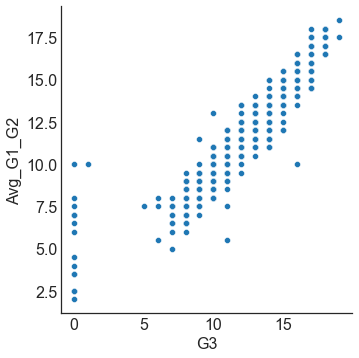

In [214]:
#Visualizing the relationship between Average of G1 & G2 column and Label column.
sns.relplot(data=df2,x="G3", y="Avg_G1_G2")

Graph shows a strong linear relationship

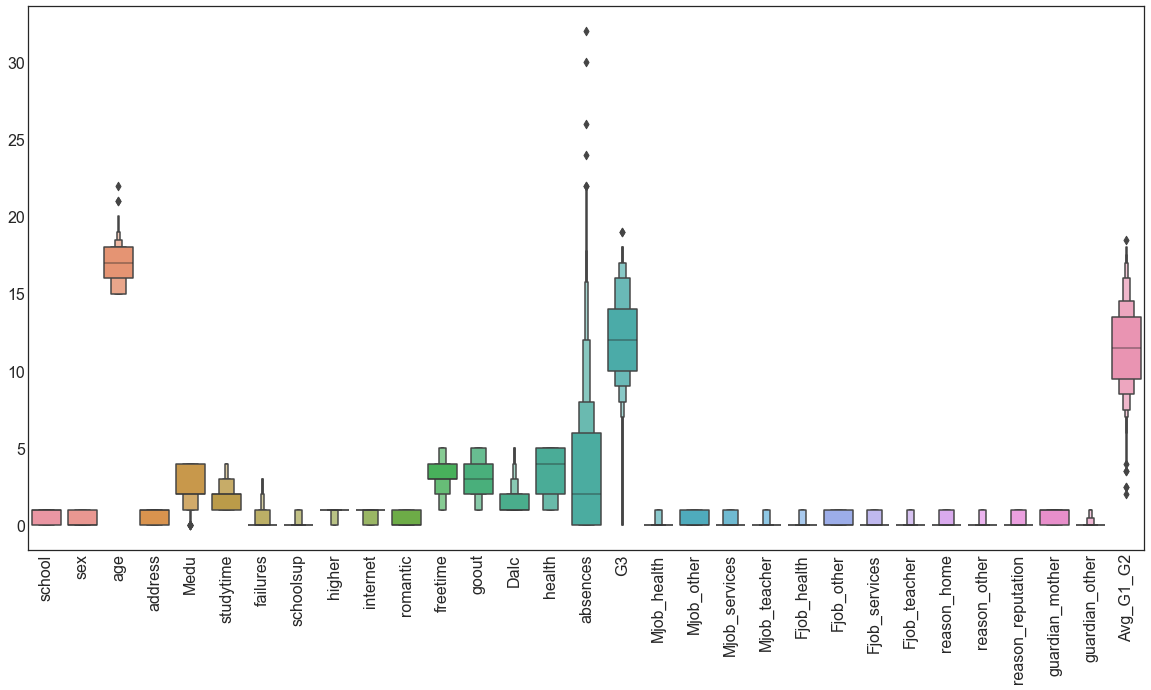

In [215]:
#Using box plot to view outliers.
plt.figure(figsize=(20,10))
sns.boxenplot(data = df2)
plt.xticks(rotation=90)
plt.show()

There are a few outliers in Avg_G1_G2, age, Medu, absences, Fedu and failures column we will remove them.


In [216]:
#Filtering the Avg_G1_G2 column from outliers.
df2 = df2[(df2["Avg_G1_G2"]<16.5) & (df2["Avg_G1_G2"]>8)]
df2 = df2[(df2["age"]<20)]
df2 = df2[(df2["Medu"]>1)]
df2 = df2[(df2["absences"]<18)]
df2 = df2[(df2["failures"]<2)]

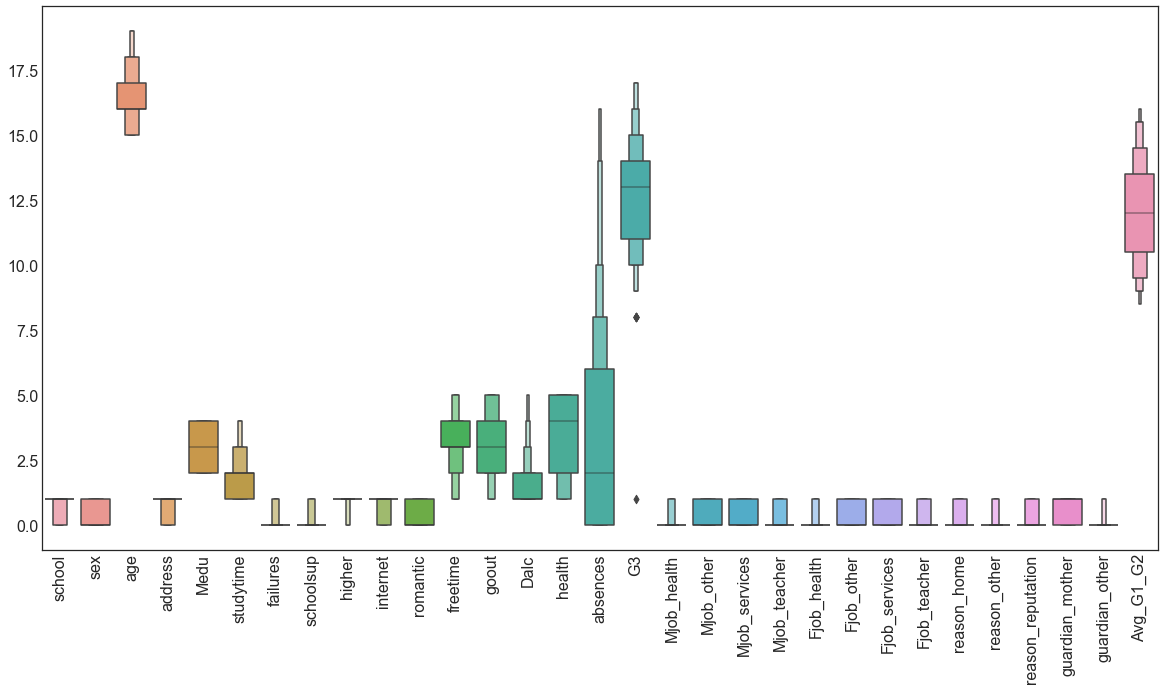

In [217]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = df2)
plt.xticks(rotation=90)
plt.show()

# Lets test our models on various algorithms

In [219]:
#Dividing the dataset into Features and Label
X=df2.drop('G3', axis=1)
y=df2['G3']

In [220]:
#Dividing the data for training and testing. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [221]:
#Standardizing our features to same scale
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [222]:
#Importing and applying the Linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
lr.score(X_test_scaled,y_test)

0.837523216989742

Accuracy from Linear Regression algorithm

In [223]:
y_pred=lr.predict(X_test_scaled)
y_pred

array([14.24105322, 13.17161905, 11.38435378, 10.33405817, 13.58215606,
       15.48431254, 15.72259379, 11.85910419, 15.88919289, 15.6041763 ,
        8.42019292, 10.12250406, 15.21193493, 12.17863734, 14.42911068,
       16.51261716, 16.16599076, 15.45208598, 11.63387776, 12.76243936,
       15.01878065, 16.2327003 , 12.07051584, 12.70783519, 14.42891983,
        9.33296446, 15.12689066, 10.29500059, 13.66574398, 12.16426101,
       14.31468872, 12.38443083, 12.07557652, 11.90853637, 12.28633615,
       13.29378611, 13.062573  , 12.89660426, 13.46948173, 13.98586563,
       10.08391718, 16.74831453, 12.07233714, 11.28220626, 11.30670805,
       11.02922327, 12.13949151, 12.96857738, 16.81502406, 16.27225256,
       13.05934492, 14.3428279 , 12.42204819, 14.31229391, 13.89206537,
        9.7643799 , 14.1864863 , 13.56130509, 15.11322842, 12.06246211,
       13.42239984, 11.55759688, 15.96373292, 15.43613196, 17.38241651,
        9.74243666, 14.36233048, 11.72708962, 10.16107491, 11.74

In [224]:
y_test.values

array([14, 13, 11, 10, 15, 15, 15, 11, 16, 16,  9, 11, 15, 10, 13, 16, 16,
       16, 11, 12, 13, 16, 12, 13, 13, 10, 15,  9, 13, 11, 14, 14, 11, 13,
       12, 14, 13, 13, 13, 12, 10, 17, 11, 12, 11, 11, 12, 13, 17, 17, 12,
       14, 12, 12, 13, 10, 13, 14, 16, 12, 14, 10, 16, 16, 16, 11, 14, 12,
       10, 11, 10, 14, 11, 15, 15, 10, 16, 14, 12, 15,  9, 17, 16],
      dtype=int64)

In [225]:
from sklearn.metrics import mean_squared_error
# We have a lower error of 0.78 points.
lin_mse = mean_squared_error(y_pred, y_test)
lin_mse

0.7886810311892917

In [226]:
#accuracy from r-squared metrics
from sklearn import metrics
accuracy = metrics.r2_score(y_test, y_pred)
accuracy

0.837523216989742

In [229]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import ShuffleSplit
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        
        'lasso': {
            'model': Lasso(),
            'params': {
                
                'alpha': [5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01, 0.001, 0.0001, 0 ],
                'selection': ['random', 'cyclic']
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                
                'alpha': [5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01, 0.001, 0.0001, 0 ]
     
              }
         }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X_train_scaled,y_train)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X_test_scaled,y_test)

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
D:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117.28274992361662, tolerance: 0.12936526717557253
  model = cd_fast.enet_coordinate_descent(
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
D

,model,best_score,best_params
0,lasso,0.842285,"{'alpha': 0.1, 'selection': 'random'}"
1,ridge,0.766933,{'alpha': 5}


Slight increase in the performance by Lasso Regression which penalizes the model based on sum of their coeffecients 

In [115]:
#We will use Random Forest Regressor algorithm with Random Search CV and Grid SearchCV for hyperparameter tuning.
from sklearn.ensemble import RandomForestRegressor 
rand_reg=RandomForestRegressor()
#A look at parameters used by our current forest
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rand_reg.get_params())


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [116]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 150, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)] 
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 6]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 5, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_search = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [117]:
#Using the above parameters in Randomized Search CV 
rf_random = RandomizedSearchCV(estimator = rand_reg, param_distributions = random_search, n_iter = 100, cv = 3, 
                               verbose=2, random_state=20, n_jobs = -1)

In [118]:
#fitting the model on training data to find best parameters
rf_random.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 10],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [150, 355, 561, 766,
                                                         972, 1177, 1383, 1588,
                                                         1794, 2000]},
                   random_state=20, verbose=2)

In [119]:
#To check the best parameters after applying Randomized Search CV
rf_random.best_params_

{'n_estimators': 355,
 'min_samples_split': 4,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [121]:
#Applying the best paramters in the Random Forest Algorithm.
rand_reg=RandomForestRegressor(n_estimators= 355,
 min_samples_split= 4,
 min_samples_leaf=10,
 max_features= 'auto',
 max_depth= 10,                               
 bootstrap= True)

In [122]:
rand_reg.fit(X_train_scaled, y_train)
y_test_pred=rand_reg.predict(X_test_scaled)

In [123]:
rand_reg.score(X_test_scaled,y_test)

0.860405565910556

The accuracy has increased after applying Random Forest Algorithm with Randomized Search CV

In [176]:
from sklearn.metrics import mean_squared_error
# We have a lower error of 0.67 points.
lin_mse = mean_squared_error(y_test_pred, y_test)
lin_mse

0.6776074721949498

Checking the difference in performance after applying GridSearch CV on Random Forest algorithm

In [151]:
from sklearn.model_selection import GridSearchCV
# Creating the parameter grid for GridSearch
param_grid = {
    
    'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}
# Creating a base model
rf = RandomForestRegressor()
# Instantiating the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [330]:
# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [130, 180, 230]},
             verbose=2)

In [332]:
#Checking the best parameters for model
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 130}

In [333]:
#Giving best parameters to the model
rf=RandomForestRegressor(bootstrap= True,
 max_depth= 20,
 max_features= 'auto',
 min_samples_leaf= 4,
 min_samples_split= 5,
 n_estimators=130)

In [334]:
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=130)

In [369]:
print('Train score:', rf.score(X_train_scaled, y_train))
print('Test score:', rf.score(X_test_scaled,y_test))

Train score: 0.8895769231838371
Test score: 0.8606153555877802


Random Forest Regressor algorithm with Grid Search CV has increased the accuracy and the accuracies of Train and Test score are almost same meaning there is no overfitting by the algorithm

In [162]:
#Using KNN Algorithm with Grid Search CV
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
param_grid1={'algorithm':['ball_tree','kd_tree','brute'],
 'n_neighbors':[3,5,7,9,11,13],
    'weights':['uniform','distance'],
    'leaf_size':[18,20,25,27,30,32,34],
    }

In [163]:
grid_search1 = GridSearchCV(estimator = knn, param_grid = param_grid1, 
                          cv = 5, n_jobs = -1, verbose = 2)
grid_search1.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [164]:
#Checking the best parameters for model
grid_search1.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 18,
 'n_neighbors': 7,
 'weights': 'distance'}

In [165]:
#Giving best parameters to the model
knn=KNeighborsRegressor(algorithm= 'ball_tree',
 leaf_size= 18,
 n_neighbors= 7,
 p=10,
 weights= 'distance')
knn.fit(X_train_scaled,y_train)
knn.score(X_test_scaled,y_test)

0.4027699184903598

Accuracy from KNN algorithm with Grid Search CV

In [154]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [155]:
#Importing XGBoost library
import xgboost as xgb

In [173]:
#from xgboost.sklearn import XGBRegressor
xgb_model=xgb.XGBRegressor(objective= 'reg:squarederror')

xgb_model.fit(X_train_scaled, y_train)
print('Train score:', xgb_model.score(X_train_scaled, y_train))
print('Test score:', xgb_model.score(X_test_scaled,y_test))

Train score: 0.9999915808204116
Test score: 0.8351829146832512


After applying the XGBoost Regressor algorithm the accuracy has increased. Out of all the algorithms tested XGBoost has performed best.

In [971]:
#Lets do graphical visulaization of the features we have chosen for predicting the score of students.

In [231]:
Label=pd.DataFrame(y)
Label.describe()

,G3
count,411.000000
mean,12.610706
std,2.229357
min,1.000000
25%,11.000000
50%,13.000000
75%,14.000000
max,17.000000


Maximum score is 17 marks

In [232]:
#Converting the label (G3) column which is a continuous value column into a categorical column.
Label['Grade'] = pd.cut(Label.G3,bins=[0,5,10,15,18],labels=['grade D','grade C','grade B','grade A'])
Label.groupby('Grade').count()
Label.drop('G3',axis=1, inplace=True)


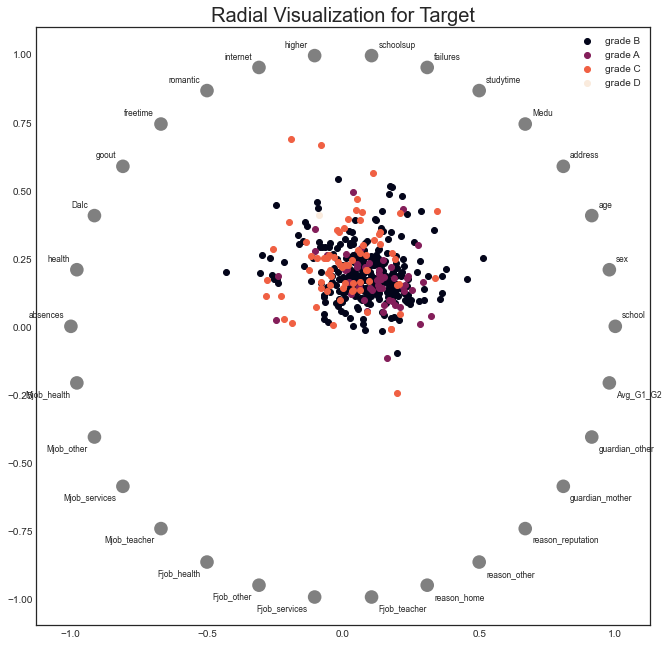

In [238]:
#Importing Radial Visualization library.
from pandas.plotting import radviz
plt.rcParams['font.size'] = '10'
fig, ax = plt.subplots(figsize=(11, 11))
new_df = X.copy()
new_df['Grade'] = Label
radviz(new_df, 'Grade', ax=ax, colormap="rocket")
plt.title('Radial Visualization for Target', fontsize = 20)
plt.show()

We can observe that almost all the features shown in the above graph influence the scores of students.